In [1]:
import sys
sys.path.append('..')

In [2]:
import string
from pathlib import Path
from random import seed, randint, choices, choice

import numpy as np
from PIL import Image, ImageDraw, ImageFilter, ImageFont, ImageOps
from tqdm import tqdm

from allometry.const import DATA_DIR, FONTS, CHAR_IMAGE_SIZE, CHARS
from allometry.training_data import TrainingData

In [3]:
trainer = TrainingData(1)

1979_dot_matrix


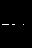

B612Mono-Bold


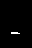

CourierPrime-Bold


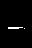

FiraMono-Bold


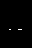

IBMPlexMono-Bold


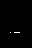

OverpassMono-Bold


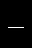

SourceCodePro-Black


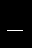

SourceCodePro-Bold


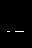

SpaceMono-Bold


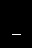

Merchant Copy Doublesize


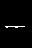

In [12]:
char = '-'
for font_path in FONTS:
    print(font_path.stem)

    image = trainer.char_image(char, font_path, soot_fract=0.075, filter_='custom-min')

    display(image)